In [1]:
using TaylorSeries, IntervalArithmetic

In [2]:
f(x) = 4*x+0.01*sin(8*pi*x)

f (generic function with 1 method)

In [3]:
using Plots

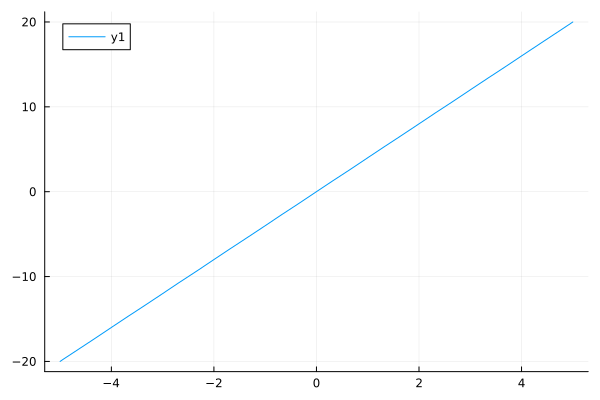

In [4]:
plot(f)

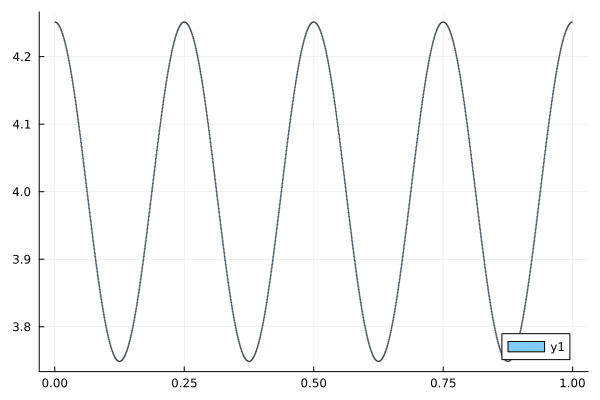

In [44]:
n = 1024
In = [interval(Float64(i), Float64(i+1))/n for i in 0:n-1]
Ct = [f(Taylor1([x, 1], 1024))[1] for x in In]
rect = In .× Ct 
plot(rect)

In [46]:
c1 = abs(1/(hull(Ct))) 

[0.23522, 0.266762]

In [47]:
theft = 2*abs(1/(hull(Ct))) #The result we are looking for, but I need to multiply the expression |(1/T')| by 2.

[0.470441, 0.533523]

Now, lets compared with the coeficient the RigosiosMeasures.

In [7]:
using RigorousInvariantMeasures

In [9]:
D = mod1_dynamic(x->4*x+0.01*sin(8*pi*x))

Piecewise-defined dynamic with 4 branches

In [10]:
B = Ulam(1024)

Ulam{LinRange{Float64, Int64}}(LinRange{Float64}(0.0, 1.0, 1025))

In [11]:
Q = DiscretizedOperator(B, D)

┌ Info: Assembling operator, the Newton stopping options are 
│ 			ϵ = 1.0e-14, max_iter = 100
└ @ RigorousInvariantMeasures /home/mutare/.julia/packages/RigorousInvariantMeasures/DkT8G/src/GenericAssembler.jl:102


Computing preimages...  50%|██████████████▌              |  ETA: 0:00:01

Computing preimages... 100%|█████████████████████████████| Time: 0:00:02


IntegralPreservingDiscretizedOperator{SparseArrays.SparseMatrixCSC{Interval{Float64}, Int64}}(sparse([1, 2, 3, 4, 5, 5, 6, 7, 8, 9  …  1016, 1017, 1018, 1019, 1020, 1020, 1021, 1022, 1023, 1024], [1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 22, 22, 22, 22, 22, 23, 23, 23, 23, 23, 24, 24, 24, 24, 24, 25, 25, 25, 25, 25, 26, 26, 26, 26, 26, 26, 27, 27, 27, 27, 27, 28, 28, 28, 28, 28, 29, 29, 29, 29, 29, 30, 30, 30, 30, 30, 31, 31, 31, 31, 31, 31, 32, 32, 32, 32, 32, 33, 33, 33, 33, 33, 34, 34, 34, 34, 34, 35, 35, 35, 35, 35, 36, 36, 36, 36, 36, 37, 37, 37, 37, 37, 37, 38, 38, 38, 38, 38, 39, 39, 39, 39, 39, 40, 40, 40, 40, 40, 41, 41, 41, 41, 41

In [12]:
norms = powernormbounds(B, D; Q=Q)

32-element Vector{Float64}:
 1.0000000000101181
 1.0000000000202365
 1.0000000000303548
 1.0000000000404732
 0.4370732693173458
 0.17114800192009244
 0.03521755661753047
 0.006136036472068662
 0.006136036472130748
 0.0061360364721928335
 ⋮
 2.3102756305491246e-7
 2.3102756305725003e-7
 2.310275630595876e-7
 2.3102756306192517e-7
 2.3102756306426275e-7
 1.0097597228682984e-7
 3.953990580531643e-8
 8.13622628209647e-9
 1.4175935529580855e-9

In [13]:
w = invariant_vector(B, Q)

1024-element Vector{Float64}:
 0.9409023502848867
 0.9409042041981964
 0.940907911992113
 0.9409134736296951
 0.9409209005057486
 0.9409301734120235
 0.9409412959956287
 0.9409542719592903
 0.9409690867009902
 0.9409857543017159
 ⋮
 0.9409690867011404
 0.940954271959119
 0.9409412959956827
 0.9409301734119645
 0.9409209005057115
 0.9409134736296351
 0.9409079119920564
 0.9409042041981178
 0.9409023502850984

In [14]:
error = distance_from_invariant(B, D, Q, w, norms)

0.1996868364817168

In [15]:
using LaTeXStrings

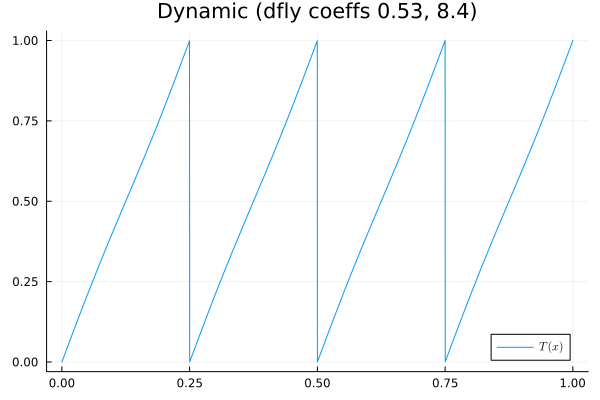

In [16]:
A, BB = dfly(strong_norm(B), aux_norm(B), D)
plot(D, title="Dynamic (dfly coeffs $(round(A, sigdigits=2)), $(round(BB, sigdigits=2)))", label=L"T(x)", legend=:bottomright)